In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import os #we will use the function listdir to list files in a folder
import math #to apply absolute value
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

# Getting Data

In [2]:
data = pd.read_csv('marketing_customer_analysis.csv', sep=",") #reading the data
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


# Cleaning/Wrangling/EDA

In [3]:
ordered_columns = sorted(data.columns, reverse=False)
ordered_columns

['Coverage',
 'Customer',
 'Customer Lifetime Value',
 'Education',
 'Effective To Date',
 'EmploymentStatus',
 'Gender',
 'Income',
 'Location Code',
 'Marital Status',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Policy',
 'Policy Type',
 'Renew Offer Type',
 'Response',
 'Sales Channel',
 'State',
 'Total Claim Amount',
 'Vehicle Class',
 'Vehicle Size']

In [4]:
data = data[ordered_columns]
data.head()

,Coverage,Customer,Customer Lifetime Value,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Number of Policies,Policy,Policy Type,Renew Offer Type,Response,Sales Channel,State,Total Claim Amount,Vehicle Class,Vehicle Size
0,Basic,BU79786,2763.519279,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,...,1,Corporate L3,Corporate Auto,Offer1,No,Agent,Washington,384.811147,Two-Door Car,Medsize
1,Extended,QZ44356,6979.535903,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,...,8,Personal L3,Personal Auto,Offer3,No,Agent,Arizona,1131.464935,Four-Door Car,Medsize
2,Premium,AI49188,12887.431650,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,...,2,Personal L3,Personal Auto,Offer1,No,Agent,Nevada,566.472247,Two-Door Car,Medsize
3,Basic,WW63253,7645.861827,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,...,7,Corporate L2,Corporate Auto,Offer1,No,Call Center,California,529.881344,SUV,Medsize
4,Basic,HB64268,2813.692575,Bachelor,2/3/11,Employed,M,43836,Rural,Single,...,1,Personal L1,Personal Auto,Offer1,No,Agent,Washington,138.130879,Four-Door Car,Medsize


In [5]:
data.columns = [data.columns[i].lower().replace(' ','_') for i in range(len(data.columns))] #standardizing the data columns
data.columns

Index(['coverage', 'customer', 'customer_lifetime_value', 'education',
       'effective_to_date', 'employmentstatus', 'gender', 'income',
       'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy',
       'policy_type', 'renew_offer_type', 'response', 'sales_channel', 'state',
       'total_claim_amount', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [6]:
len(data)

9134

In [7]:
data.customer.nunique() #Check to see if we have duplicates

9134

**There are no duplicates in 'customer'**

In [8]:
data. isnull(). sum()

coverage                         0
customer                         0
customer_lifetime_value          0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy                           0
policy_type                      0
renew_offer_type                 0
response                         0
sales_channel                    0
state                            0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

**There are no null values in any of the columns**

In [9]:
data

,coverage,customer,customer_lifetime_value,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,...,number_of_policies,policy,policy_type,renew_offer_type,response,sales_channel,state,total_claim_amount,vehicle_class,vehicle_size
0,Basic,BU79786,2763.519279,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,...,1,Corporate L3,Corporate Auto,Offer1,No,Agent,Washington,384.811147,Two-Door Car,Medsize
1,Extended,QZ44356,6979.535903,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,...,8,Personal L3,Personal Auto,Offer3,No,Agent,Arizona,1131.464935,Four-Door Car,Medsize
2,Premium,AI49188,12887.431650,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,...,2,Personal L3,Personal Auto,Offer1,No,Agent,Nevada,566.472247,Two-Door Car,Medsize
3,Basic,WW63253,7645.861827,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,...,7,Corporate L2,Corporate Auto,Offer1,No,Call Center,California,529.881344,SUV,Medsize
4,Basic,HB64268,2813.692575,Bachelor,2/3/11,Employed,M,43836,Rural,Single,...,1,Personal L1,Personal Auto,Offer1,No,Agent,Washington,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,Basic,LA72316,23405.987980,Bachelor,2/10/11,Employed,M,71941,Urban,Married,...,2,Personal L1,Personal Auto,Offer2,No,Web,California,198.234764,Four-Door Car,Medsize
9130,Extended,PK87824,3096.511217,College,2/12/11,Employed,F,21604,Suburban,Divorced,...,1,Corporate L3,Corporate Auto,Offer1,Yes,Branch,California,379.200000,Four-Door Car,Medsize
9131,Extended,TD14365,8163.890428,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,...,2,Corporate L2,Corporate Auto,Offer1,No,Branch,California,790.784983,Four-Door Car,Medsize
9132,Extended,UP19263,7524.442436,College,2/3/11,Employed,M,21941,Suburban,Married,...,3,Personal L2,Personal Auto,Offer3,No,Branch,California,691.200000,Four-Door Car,Large


In [10]:
y = data['total_claim_amount'] #splitting the target and other columns
X = data.drop(['total_claim_amount'], axis=1)
X.head()

,coverage,customer,customer_lifetime_value,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,...,number_of_open_complaints,number_of_policies,policy,policy_type,renew_offer_type,response,sales_channel,state,vehicle_class,vehicle_size
0,Basic,BU79786,2763.519279,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,...,0,1,Corporate L3,Corporate Auto,Offer1,No,Agent,Washington,Two-Door Car,Medsize
1,Extended,QZ44356,6979.535903,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,...,0,8,Personal L3,Personal Auto,Offer3,No,Agent,Arizona,Four-Door Car,Medsize
2,Premium,AI49188,12887.431650,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,...,0,2,Personal L3,Personal Auto,Offer1,No,Agent,Nevada,Two-Door Car,Medsize
3,Basic,WW63253,7645.861827,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,...,0,7,Corporate L2,Corporate Auto,Offer1,No,Call Center,California,SUV,Medsize
4,Basic,HB64268,2813.692575,Bachelor,2/3/11,Employed,M,43836,Rural,Single,...,0,1,Personal L1,Personal Auto,Offer1,No,Agent,Washington,Four-Door Car,Medsize


In [11]:
numerical = X.select_dtypes(include = np.number)#splitting categorical and numerical columns
categoricals = X.select_dtypes(include = np.object)


# Categorical Features

In [12]:
categoricals

,coverage,customer,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy,policy_type,renew_offer_type,response,sales_channel,state,vehicle_class,vehicle_size
0,Basic,BU79786,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate L3,Corporate Auto,Offer1,No,Agent,Washington,Two-Door Car,Medsize
1,Extended,QZ44356,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal L3,Personal Auto,Offer3,No,Agent,Arizona,Four-Door Car,Medsize
2,Premium,AI49188,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal L3,Personal Auto,Offer1,No,Agent,Nevada,Two-Door Car,Medsize
3,Basic,WW63253,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate L2,Corporate Auto,Offer1,No,Call Center,California,SUV,Medsize
4,Basic,HB64268,Bachelor,2/3/11,Employed,M,Rural,Single,Personal L1,Personal Auto,Offer1,No,Agent,Washington,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,Basic,LA72316,Bachelor,2/10/11,Employed,M,Urban,Married,Personal L1,Personal Auto,Offer2,No,Web,California,Four-Door Car,Medsize
9130,Extended,PK87824,College,2/12/11,Employed,F,Suburban,Divorced,Corporate L3,Corporate Auto,Offer1,Yes,Branch,California,Four-Door Car,Medsize
9131,Extended,TD14365,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate L2,Corporate Auto,Offer1,No,Branch,California,Four-Door Car,Medsize
9132,Extended,UP19263,College,2/3/11,Employed,M,Suburban,Married,Personal L2,Personal Auto,Offer3,No,Branch,California,Four-Door Car,Large


# Numerical Features

In [13]:
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,2763.519279,56274,69,32,5,0,1
1,6979.535903,0,94,13,42,0,8
2,12887.431650,48767,108,18,38,0,2
3,7645.861827,0,106,18,65,0,7
4,2813.692575,43836,73,12,44,0,1
...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2
9130,3096.511217,21604,79,14,28,0,1
9131,8163.890428,0,85,9,37,3,2
9132,7524.442436,21941,96,34,3,0,3


# Exploration

In [14]:
round(data.corr(),2)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.00,0.02,0.40,0.01,0.01,-0.04,0.02,0.23
income,0.02,1.00,-0.02,-0.03,-0.00,0.01,-0.01,-0.36
monthly_premium_auto,0.40,-0.02,1.00,0.01,0.02,-0.01,-0.01,0.63
months_since_last_claim,0.01,-0.03,0.01,1.00,-0.04,0.01,0.01,0.01
months_since_policy_inception,0.01,-0.00,0.02,-0.04,1.00,-0.00,-0.01,0.00
number_of_open_complaints,-0.04,0.01,-0.01,0.01,-0.00,1.00,0.00,-0.01
number_of_policies,0.02,-0.01,-0.01,0.01,-0.01,0.00,1.00,-0.00
total_claim_amount,0.23,-0.36,0.63,0.01,0.00,-0.01,-0.00,1.00


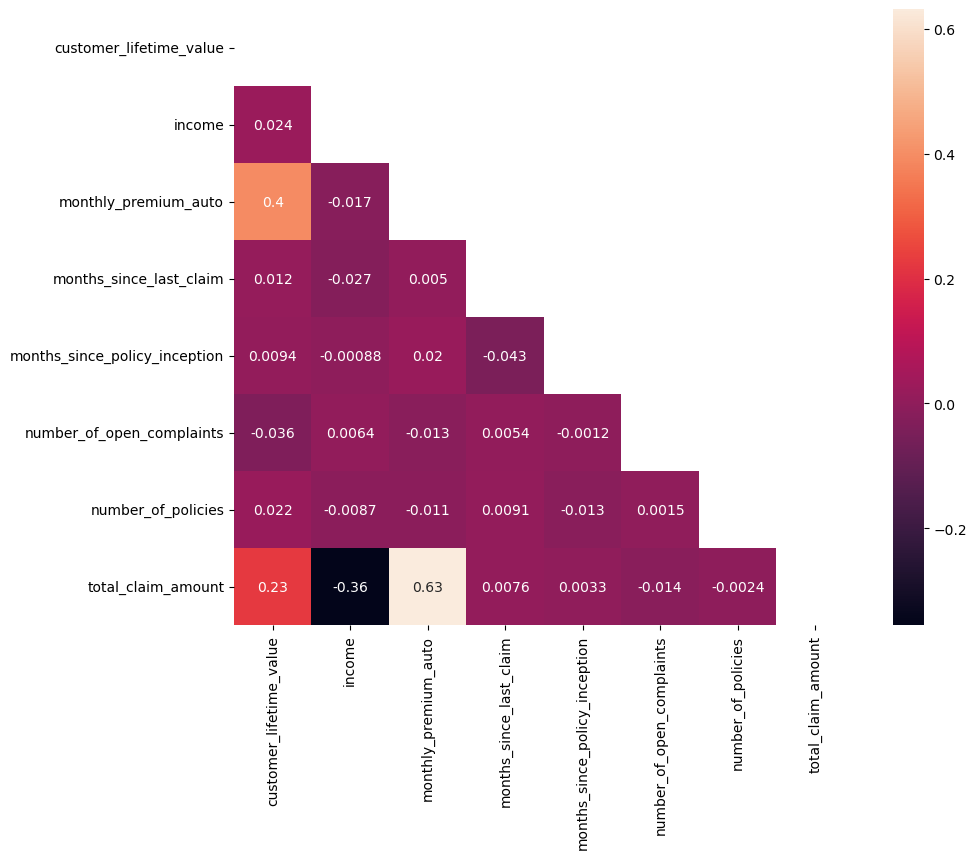

In [15]:
#HEATMAP
mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(data.corr(), mask=mask, annot=True)
plt.show()

In [16]:
numerical.drop(['customer_lifetime_value'], axis = 1)


,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,56274,69,32,5,0,1
1,0,94,13,42,0,8
2,48767,108,18,38,0,2
3,0,106,18,65,0,7
4,43836,73,12,44,0,1
...,...,...,...,...,...,...
9129,71941,73,18,89,0,2
9130,21604,79,14,28,0,1
9131,0,85,9,37,3,2
9132,21941,96,34,3,0,3


# Dealing with outliers

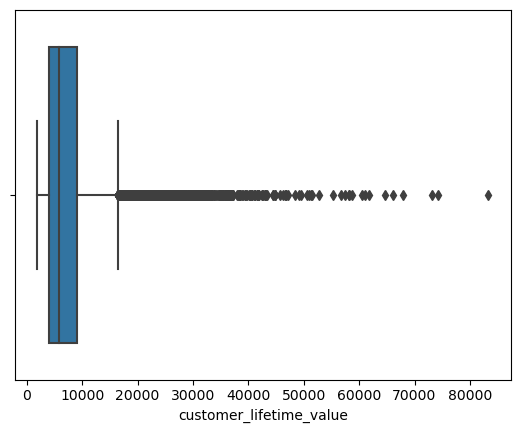

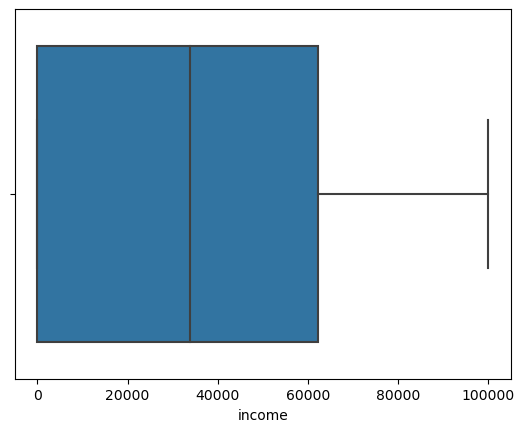

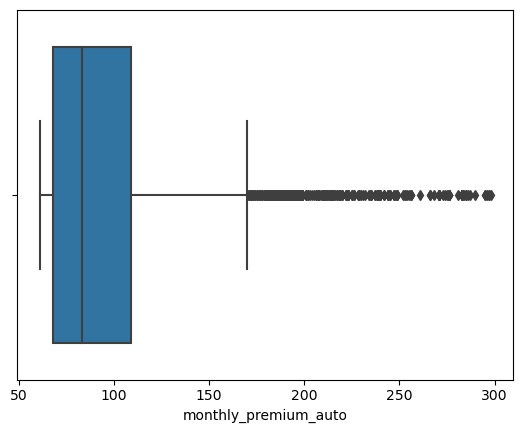

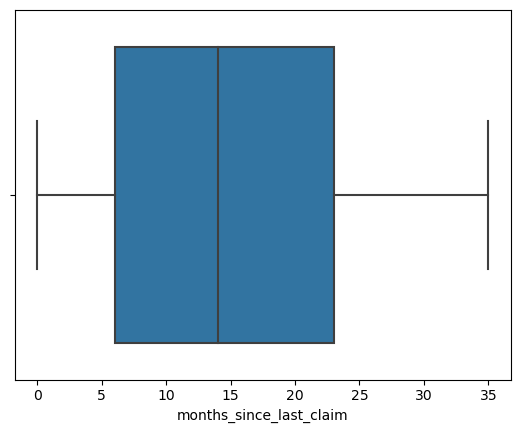

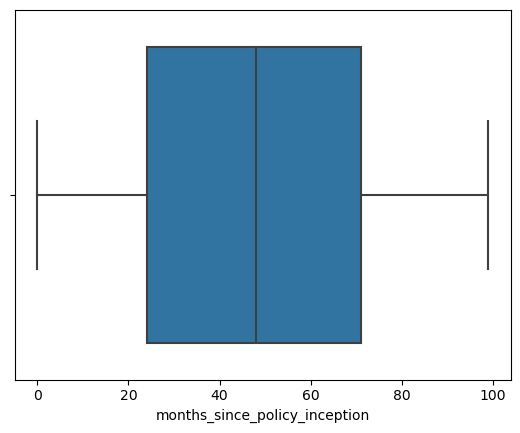

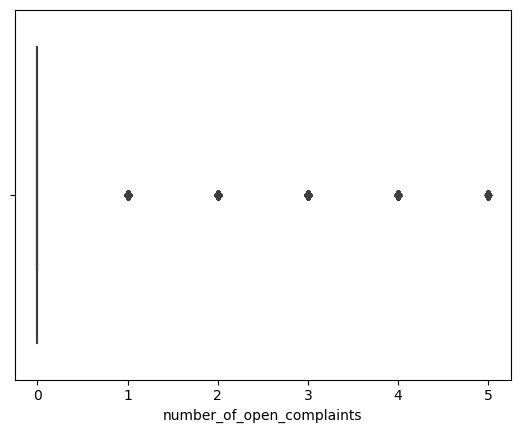

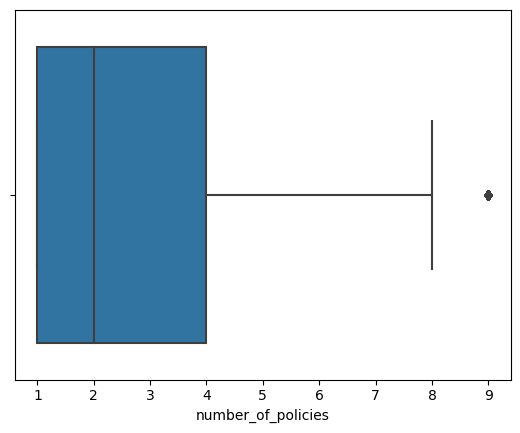

In [17]:
for column in numerical.columns: #check the boxplots for all the columns to see which columns have more outliers
    sns.boxplot(x=numerical[column] ,whis=1.5)
    plt.show()

**customer_lifetime_value and monthly_premium_auto have many outliers. 

<AxesSubplot:xlabel='monthly_premium_auto'>

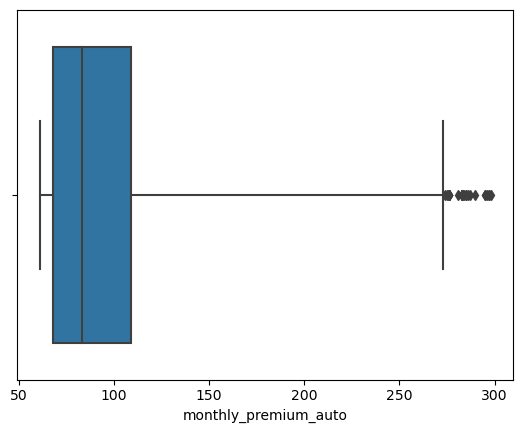

In [18]:
sns.boxplot(x=data['monthly_premium_auto'],whis=4) #check the outliers

In [19]:
iqr = np.percentile(data['monthly_premium_auto'],75) - np.percentile(data['monthly_premium_auto'],25) # measuring the iqr of the column
iqr 

41.0

In [20]:
# define the limits
upper_limit = np.percentile(data['monthly_premium_auto'],75) + 8*iqr
lower_limit = np.percentile(data['monthly_premium_auto'],25) - 8*iqr
upper_limit, lower_limit

(437.0, -260.0)

In [21]:
data = data[(data['monthly_premium_auto']>lower_limit) & (data['monthly_premium_auto']<upper_limit)] #removing outliers from the data
data

,coverage,customer,customer_lifetime_value,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,...,number_of_policies,policy,policy_type,renew_offer_type,response,sales_channel,state,total_claim_amount,vehicle_class,vehicle_size
0,Basic,BU79786,2763.519279,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,...,1,Corporate L3,Corporate Auto,Offer1,No,Agent,Washington,384.811147,Two-Door Car,Medsize
1,Extended,QZ44356,6979.535903,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,...,8,Personal L3,Personal Auto,Offer3,No,Agent,Arizona,1131.464935,Four-Door Car,Medsize
2,Premium,AI49188,12887.431650,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,...,2,Personal L3,Personal Auto,Offer1,No,Agent,Nevada,566.472247,Two-Door Car,Medsize
3,Basic,WW63253,7645.861827,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,...,7,Corporate L2,Corporate Auto,Offer1,No,Call Center,California,529.881344,SUV,Medsize
4,Basic,HB64268,2813.692575,Bachelor,2/3/11,Employed,M,43836,Rural,Single,...,1,Personal L1,Personal Auto,Offer1,No,Agent,Washington,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,Basic,LA72316,23405.987980,Bachelor,2/10/11,Employed,M,71941,Urban,Married,...,2,Personal L1,Personal Auto,Offer2,No,Web,California,198.234764,Four-Door Car,Medsize
9130,Extended,PK87824,3096.511217,College,2/12/11,Employed,F,21604,Suburban,Divorced,...,1,Corporate L3,Corporate Auto,Offer1,Yes,Branch,California,379.200000,Four-Door Car,Medsize
9131,Extended,TD14365,8163.890428,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,...,2,Corporate L2,Corporate Auto,Offer1,No,Branch,California,790.784983,Four-Door Car,Medsize
9132,Extended,UP19263,7524.442436,College,2/3/11,Employed,M,21941,Suburban,Married,...,3,Personal L2,Personal Auto,Offer3,No,Branch,California,691.200000,Four-Door Car,Large


In [22]:
len(y)

9134

In [23]:
len(X)

9134

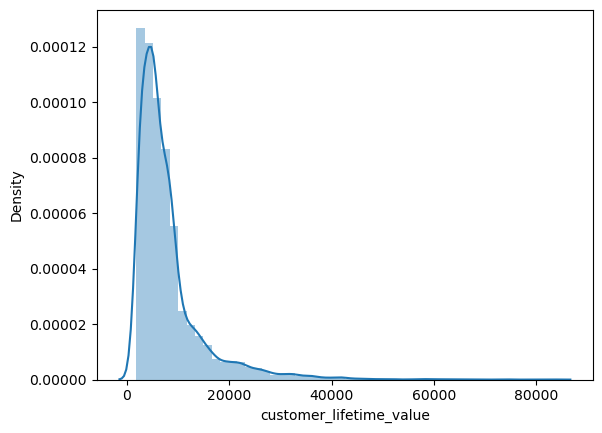

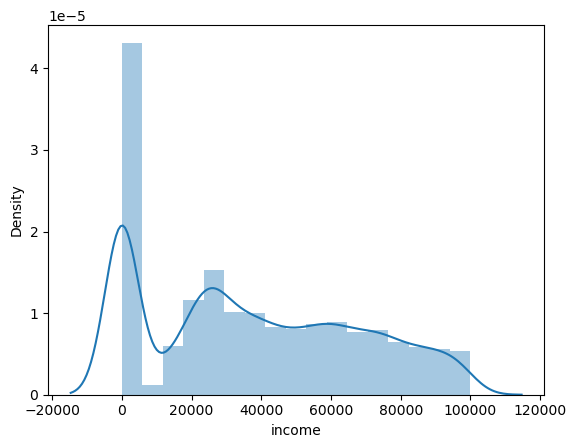

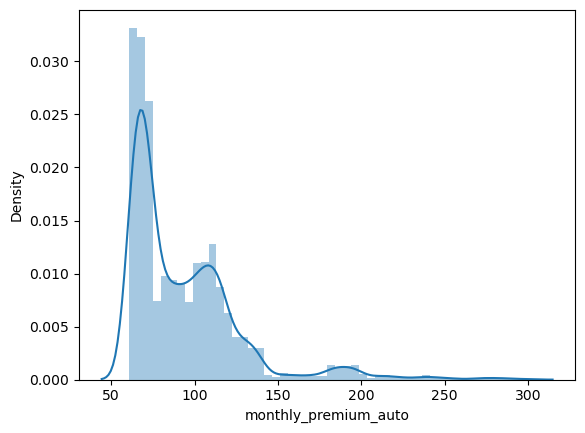

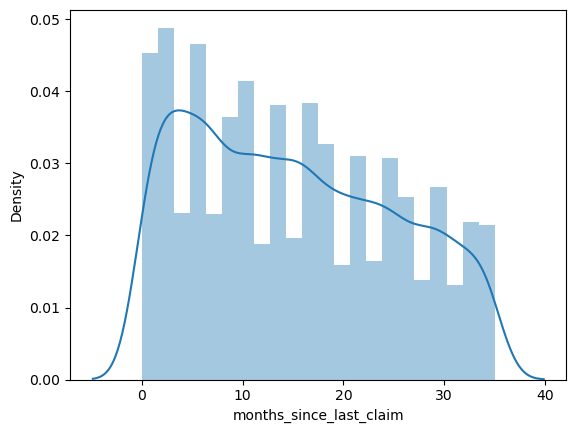

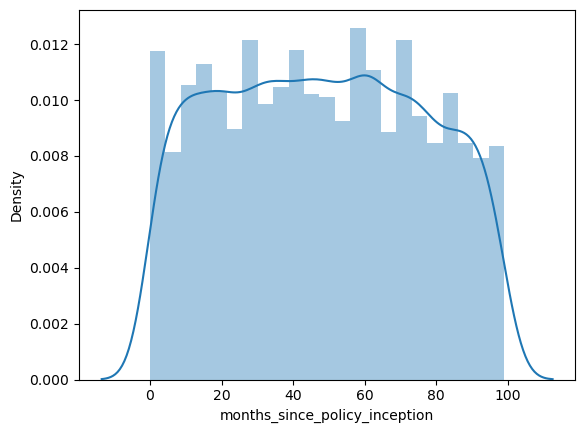

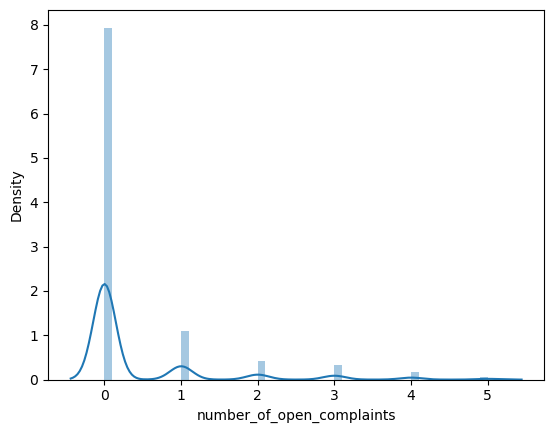

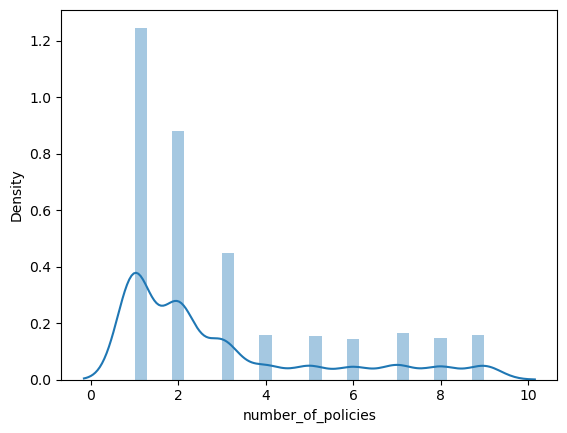

In [24]:
for column in numerical.columns:
    sns.distplot(data[column])
    plt.show()

# Normalization

In [25]:
transformer = MinMaxScaler().fit(numerical) ### USE MINMAX FOR NORMALIZING
x_minmax = transformer.transform(numerical) #This is a an array of arrays
print(x_minmax.shape)

(9134, 7)


In [26]:
x_minmax

array([[0.01062925, 0.56284694, 0.03375527, ..., 0.05050505, 0.        ,
        0.        ],
       [0.06240565, 0.        , 0.13924051, ..., 0.42424242, 0.        ,
        0.875     ],
       [0.13495982, 0.48776267, 0.19831224, ..., 0.38383838, 0.        ,
        0.125     ],
       ...,
       [0.07695057, 0.        , 0.10126582, ..., 0.37373737, 0.6       ,
        0.125     ],
       [0.06909758, 0.2194517 , 0.14767932, ..., 0.03030303, 0.        ,
        0.25      ],
       [0.00876645, 0.        , 0.06751055, ..., 0.90909091, 0.        ,
        0.        ]])

In [27]:
X_num_norm = pd.DataFrame(x_minmax,columns=numerical.columns)
X_num_norm.head() 

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000


<AxesSubplot:xlabel='monthly_premium_auto', ylabel='Density'>

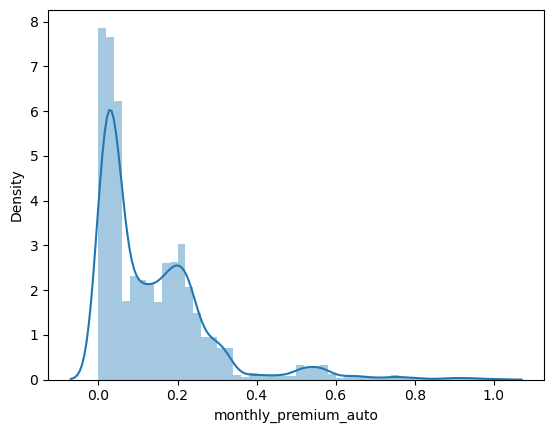

In [28]:
sns.distplot(X_num_norm['monthly_premium_auto'])

# Encoding Categorical Data

In [29]:
#one Hot encoding using 4 different columns

enc = OneHotEncoder(sparse=False)
columns_to_one_hot = ['marital_status','gender','policy_type','response']
encoded_array = enc.fit_transform(categoricals.loc[:,columns_to_one_hot])
categoricals_encoded = pd.DataFrame(encoded_array,columns=enc.get_feature_names_out() )
categoricals_sklearn_encoded = pd.concat([categoricals,categoricals_encoded],axis=1)
categoricals_sklearn_encoded.drop(labels= columns_to_one_hot,axis=1,inplace=True)
categoricals_sklearn_encoded

,coverage,customer,education,effective_to_date,employmentstatus,location_code,policy,renew_offer_type,sales_channel,state,...,marital_status_Divorced,marital_status_Married,marital_status_Single,gender_F,gender_M,policy_type_Corporate Auto,policy_type_Personal Auto,policy_type_Special Auto,response_No,response_Yes
0,Basic,BU79786,Bachelor,2/24/11,Employed,Suburban,Corporate L3,Offer1,Agent,Washington,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,Extended,QZ44356,Bachelor,1/31/11,Unemployed,Suburban,Personal L3,Offer3,Agent,Arizona,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,Premium,AI49188,Bachelor,2/19/11,Employed,Suburban,Personal L3,Offer1,Agent,Nevada,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,Basic,WW63253,Bachelor,1/20/11,Unemployed,Suburban,Corporate L2,Offer1,Call Center,California,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4,Basic,HB64268,Bachelor,2/3/11,Employed,Rural,Personal L1,Offer1,Agent,Washington,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,Basic,LA72316,Bachelor,2/10/11,Employed,Urban,Personal L1,Offer2,Web,California,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
9130,Extended,PK87824,College,2/12/11,Employed,Suburban,Corporate L3,Offer1,Branch,California,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
9131,Extended,TD14365,Bachelor,2/6/11,Unemployed,Suburban,Corporate L2,Offer1,Branch,California,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
9132,Extended,UP19263,College,2/3/11,Employed,Suburban,Personal L2,Offer3,Branch,California,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [30]:
#label encoding
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'renew_offer_type'.
categoricals['renew_offer_type']= label_encoder.fit_transform(categoricals['renew_offer_type'])
  
categoricals['renew_offer_type'].unique()

array([0, 2, 1, 3])

In [31]:
#ordinal encoding (method 1 without using OrdinalEncoder)
scale_mapper = {'Small':1, 'Medsize':2, 'Large':3}
categoricals['vehicle_size'] = categoricals['vehicle_size'].replace(scale_mapper) 
categoricals['vehicle_size']

0       2
1       2
2       2
3       2
4       2
       ..
9129    2
9130    2
9131    2
9132    3
9133    2
Name: vehicle_size, Length: 9134, dtype: int64

In [34]:
# concatinating the numerical and encoded categorical columns
numerical = X.select_dtypes(include = np.number)
X = pd.concat([numerical, categoricals['renew_offer_type'] , categoricals['vehicle_size'], categoricals_encoded], axis=1)
X.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,renew_offer_type,vehicle_size,marital_status_Divorced,marital_status_Married,marital_status_Single,gender_F,gender_M,policy_type_Corporate Auto,policy_type_Personal Auto,policy_type_Special Auto,response_No,response_Yes
0,2763.519279,56274,69,32,5,0,1,0,2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,6979.535903,0,94,13,42,0,8,2,2,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,12887.431650,48767,108,18,38,0,2,0,2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,7645.861827,0,106,18,65,0,7,0,2,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4,2813.692575,43836,73,12,44,0,1,0,2,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


# Splitting into train set and test set

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

#  Modeling

In [36]:
model = LinearRegression()
model.fit(X_train,y_train)
X_train.shape

(6393, 19)

# Model Validation

In [37]:
predictions  = model.predict(X_test)
predictions.shape

(2741,)

In [38]:
predictions

array([379.16054061, 425.28094819, 276.17271009, ..., 471.26504142,
       371.99549552, 707.9467911 ])

In [39]:
#Model Validation
r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)

print("r2 = ", r2)
print("RMSE = ", RMSE)
print("MSE = ", MSE)

r2 =  0.5477432887765873
RMSE =  192.14490328667623
MSE =  36919.66385904616
